# Отчет по заданию 5 по практикуму на ЭВМ

Выполнил студент 317 группы Измаилов Павел Алексеевич

Москва, 22 февраля 2016

##Описание проделанной работы

В данном отчете содержатся описания и результаты экспериментов, проведенных мной в соответствии с четвертым заданием по курсу практикума на ЭВМ на кафедре ММП ВМК МГУ. Мной были выполнены все части задания, кроме бонусной.


#НАДО ПРОВЕРИТЬ

##Описание релизованных модулей

Мною были реализованы все модули из задания в соответствии с требованиями. Также были реализованы некоторые вспомогательные функции, описание которых я здесь не привожу. Все реализованные функции снабжены поясняющими комментариями.

##Обучение разреженного автокодировщика 

В данном разделе приводится код, относящийся к экспериментам по обучению автокодировщика.

Импортируем используемые библиотеки.

In [4]:
import numpy as np
import pickle
from scipy.optimize import minimize
import sys
from scipy.misc import imshow
import matplotlib.pyplot as plt

from autoencoder import initialize, autoencoder_loss, autoencoder_transform, autoencoder_get_filters
from sample_patches import sample_patches, normalize_data, get_reshaped_image_size
from display_layer import display_layer
import matplotlib2tikz as tikz

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Сформируем выборку.

In [3]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
images = images_dict['X']
n_patches = 100000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

Инициализируем нейронную сеть и ее параметры

In [10]:
visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
beta = 3
sparcity = 1e-2
lambda_ = 1e-4

Обучим автокодировщик

In [11]:
res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data)
               , x0=theta, method="L-BFGS-B", jac=True, options={'maxiter':2000, 'disp':1})
theta = res['x']

Рассмотрим, как автокодировщик восстанавливает поданное на вход изображение

In [1]:
transformed_patches = autoencoder_transform(theta, visible_layer_size, 
                                          hidden_layer_sizes, 2, patches)
transformed_patches = transformed_patches.T
img = display_layer(patches[:36, :])
plt.imshow(img, interpolation='Nearest')
plt.show()
img = display_layer(transformed_patches[:36, :])
plt.imshow(img, interpolation='Nearest')
plt.show()

NameError: name 'autoencoder_transform' is not defined

(192,)


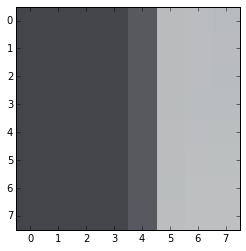

(192, 1)


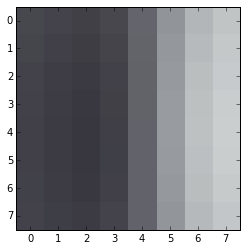

1741.75336923
[ 0.01330147]


In [49]:
patch = patches[10]
print(patch.shape)
plt.imshow(patch.reshape((8, 8, 3)), interpolation='Nearest')
plt.show()
transformed_patch = autoencoder_transform(theta, visible_layer_size, hidden_layer_sizes, 2, patch[None, :])
print(transformed_patch.shape)
plt.imshow(transformed_patch.reshape((8, 8, 3)), interpolation='Nearest')
plt.show()
print(np.sum((transformed_patch - patch)**2) /2)
print(transformed_patch[10] - patch[10])

Полученные фильтры для $10^5$ патчей.

8


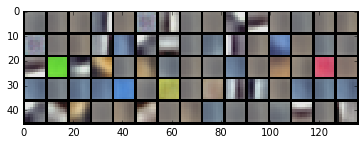

In [15]:
filters = autoencoder_get_filters(theta, visible_layer_size, hidden_layer_sizes)
img = display_layer(filters)
plt.imshow(img, interpolation='Nearest')
plt.show()

###Влияние параметров автокодировщика на вид фильтров

####Влияние разреженности
Разреженность автокодировщика зависит от двух параметров — beta и sparcity.

Изучим зависимость вида фильтров от каждого из этих параметров

8


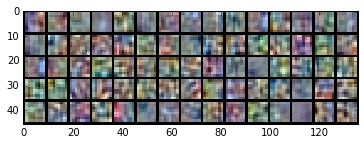

8


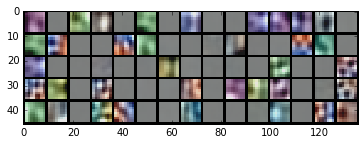

8


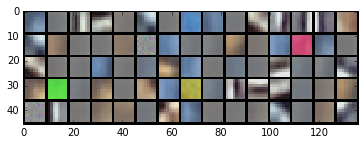

8


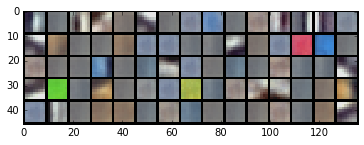

8


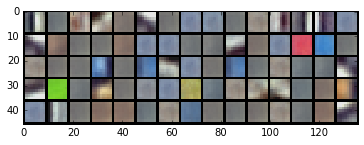

In [4]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
images = images_dict['X']
n_patches = 20000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
# data = np.arange(4,7).reshape(1, 3)
# beta = 3
sparcity = 1e-2
lambda_ = 1e-4
for beta in [0, 1e-2, 1, 3, 1e2]:
    res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data)
               , x0=theta, method="L-BFGS-B", jac=True, options={'maxiter':2000, 'disp':1})
    theta = res['x']
    np.save('../data/theta'+str(beta)+'.npy', theta)
    filters = autoencoder_get_filters(theta, visible_layer_size, hidden_layer_sizes)
    img = display_layer(filters, 'filters_' + str(beta)+'.png')
    plt.imshow(img, interpolation='Nearest')
    plt.show()

Теперь рассмотрим влияение sparcity.

8


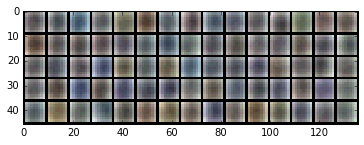

8


/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:216: RuntimeWarning: divide by zero encountered in log
  + (1 - sparsity_param) * np.log((1 - sparsity_param) / (1 - rho_j)))
/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:216: RuntimeWarning: invalid value encountered in multiply
  + (1 - sparsity_param) * np.log((1 - sparsity_param) / (1 - rho_j)))


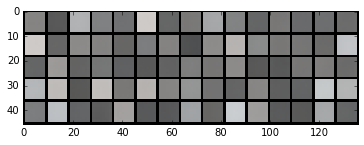

In [5]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
images = images_dict['X']
n_patches = 20000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
# data = np.arange(4,7).reshape(1, 3)
beta = 3
# sparcity = 1e-2
lambda_ = 1e-4
for sparcity in [1e-4, 1]:
    res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data)
               , x0=theta, method="L-BFGS-B", jac=True, options={'maxiter':2000, 'disp':1})
    theta = res['x']
    np.save('../data/theta_sparcity_'+str(sparcity)+'.npy', theta)
    filters = autoencoder_get_filters(theta, visible_layer_size, hidden_layer_sizes)
    img = display_layer(filters, '../images/filters_sparcity_' + str(sparcity)+'.png')
    plt.imshow(img, interpolation='Nearest')
    plt.show()

Наконец, исследуем зависимость от lambda.

8


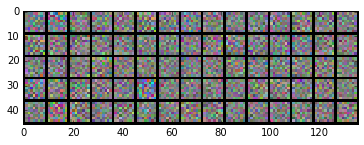

/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:216: RuntimeWarning: divide by zero encountered in true_divide
  + (1 - sparsity_param) * np.log((1 - sparsity_param) / (1 - rho_j)))
/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:170: RuntimeWarning: overflow encountered in exp
  return np.exp(arr) / (1 + np.exp(arr))**2
/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:170: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(arr) / (1 + np.exp(arr))**2
/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:227: RuntimeWarning: divide by zero encountered in true_divide
  + beta * (-(sparsity_param / rhos[layer]) + (1 - sparsity_param)/(1 - rhos

8


/Users/IzmailovPavel/Documents/Education/Programming/Python/Machine Learning/Practicum 2015:2016/5. Autoencoder/code/autoencoder.py:160: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-arr))


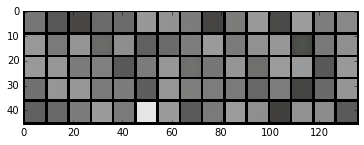

8


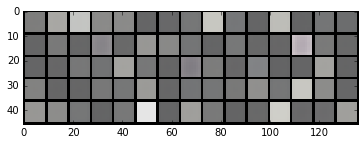

In [7]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
images = images_dict['X']
n_patches = 20000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
# data = np.arange(4,7).reshape(1, 3)
beta = 3
sparcity = 1e-2
# lambda_ = 1e-4
for lambda_ in [0, 1e-1, 1e1]:
    res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data)
               , x0=theta, method="L-BFGS-B", jac=True, options={'maxiter':2000, 'disp':1})
    theta = res['x']
    np.save('../data/theta_lambda_'+str(sparcity)+'.npy', theta)
    filters = autoencoder_get_filters(theta, visible_layer_size, hidden_layer_sizes)
    img = display_layer(filters, '../images/filters_lambda_' + str(sparcity)+'.png')
    plt.imshow(img, interpolation='Nearest')
    plt.show()

##Обучение классификаторов на признаках, выделенных автокодировщиком

В данном разделе мы обучим два типа моделей на признаках, выбранных автокодировщиком, и на значениях интенсивности в пикселях исходного изображения.

Сформируем выборку патчей 8 на 8 на основе 20000 изображений из файла unlabeled.pk.

In [9]:
images = np.load('../data/unlabeled.npy')
n_patches = 20000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

Инициализируем автокодировщик

In [10]:
visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta_20k = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
beta = 3
sparcity = 1e-2
lambda_ = 1e-4

Обучим автокодировщик

In [13]:
res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data)
               , x0=theta_20k, method="L-BFGS-B", jac=True, options={'maxiter':3000, 'disp':1})
theta_20k = res['x']
np.save('../data/theta20k.npy', theta_20k)

In [11]:
theta_20k = np.load('../data/theta20k.npy')

Выведем фильтры.

8


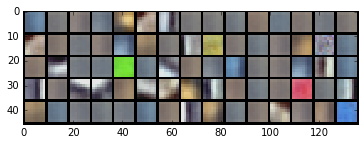

In [22]:
filters = autoencoder_get_filters(theta_20k, visible_layer_size, hidden_layer_sizes)
img = display_layer(filters, '../images/filters20k.png')
plt.imshow(img, interpolation='Nearest')
plt.show()

Обучим классификатор на признаках, выделенных автокодировщиком. Будем обучать логистическую регрессию и случайный лес.

In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

Загрузим обучающую и тестовую выборки

In [8]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
train = images_dict['X'].astype(float)
answers = images_dict['y']
train = normalize_data(train)
images_dict = pickle.load(open('../data/test.pk', 'rb'))
test = images_dict['X'].astype(float)
test_answers = images_dict['y']
test = normalize_data(test)

Опишем функцию, разбивающую картинку на патчи.

In [8]:
def get_features(imgs, patch_size, step, layer, h_size, v_size, theta):
    N, D = imgs.shape
    d = get_reshaped_image_size(D)
    imgs = imgs.reshape(N, d, d, 3)
    num_patches = int((d - patch_size)/step)+1
    features = np.zeros((N, 1))
    left, right, up, down = 0, patch_size, 0, patch_size
    for i in range(num_patches):
        for j in range (num_patches):
            ix_grid = np.ix_(range(N), range(left, right), range(up, down), range(3))
            current_patches = imgs[ix_grid]
            current_patches =  current_patches.reshape(N, patch_size**2 * 3)
            codes = autoencoder_transform(theta, v_size, h_size, layer, current_patches)
            codes = codes.T
            features = np.hstack((features, codes))
        left += step
        right += step
        up+=step
        down+= step
    return features[:, 1:]

###Логистическая регрессия

Обучим линейный классификатор на значения интенсивности

In [28]:
pixel_logreg = LogisticRegression()
pixel_logreg.fit(train, answers[:, 0])
test_predicted = pixel_logreg.predict(test)
print(np.sum(test_predicted != test_answers[:,0]))

5475


Теперь обучим классификатор для разных значений шага

In [95]:
logregs = []
for step in [4, 8, 16, 32]:
    print('Step:', step)
    features = get_features(train[:, :], 8, step, 1, hidden_layer_sizes, visible_layer_size, theta_20k)
    logregs.append(LogisticRegression())
    logregs[-1].fit(features, answers[:, 0])

Step: 4
Step: 8
Step: 16
Step: 32


In [96]:
i = 0
for step in [4, 8, 16, 32]:
    features = get_features(test, 8, step, 1, hidden_layer_sizes, visible_layer_size, theta_20k)
    ae_test_predicted = logregs[i].predict(features)
    print('Errors for step', step, ':', np.sum(ae_test_predicted != test_answers[:,0]))
    i+=1

Errors for step 4 : 5599
Errors for step 8 : 5463
Errors for step 16 : 5488
Errors for step 32 : 5887


###Случайный лес
Теперь обучим случайный лес

In [97]:
pixel_forest = RandomForestClassifier(n_estimators=20, n_jobs=-1)
pixel_forest.fit(train, answers[:, 0])
test_predicted = pixel_forest.predict(test)
print(np.sum(test_predicted != test_answers[:,0]))

5095


In [98]:
forests = []
for step in [4, 8, 16, 32]:
    print('Step:', step)
    features = get_features(train[:, :], 8, step, 1, hidden_layer_sizes, visible_layer_size, theta_20k)
    forests.append(RandomForestClassifier(n_estimators=100, n_jobs=-1))
    forests[-1].fit(features, answers[:, 0])
i = 0
for step in [4, 8, 16, 32]:
    features = get_features(test, 8, step, 1, hidden_layer_sizes, visible_layer_size, theta_20k)
    ae_test_predicted = forests[i].predict(features)
    print('Errors for step', step, ':', np.sum(ae_test_predicted != test_answers[:,0]))
    i+=1

Step: 4
Step: 8
Step: 16
Step: 32
Errors for step 4 : 4974
Errors for step 8 : 4993
Errors for step 16 : 5142
Errors for step 32 : 5438


##Автокодировщик с тремя скрытыми слоями

Обучим автокодировщик с тремя скрытыми слоями и исследуем влияние его структуры на качество классификации.

Загрузим выборку и сгенерируем патчи.

In [3]:
images = np.load('../data/unlabeled.npy')
n_patches = 50000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

Инициализируем автокодировщик с тремя скрытыми слоями.

In [100]:
visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75, 50, 75])
theta_50k = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
# data = np.arange(4,7).reshape(1, 3)
beta = 0
sparcity = 1e-2
lambda_ = 1e-4

Обучим автокодировщик

In [101]:
res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data)
               , x0=theta_50k, method="L-BFGS-B", jac=True, options={'maxiter':1000, 'disp':1})
theta_50k = res['x']
np.save('../data/theta50k.npy', theta_50k)

Обучим классификатор

In [102]:
logregs = []
for step in [4, 8, 16, 32]:
    print('Step:', step)
    features = get_features(train[:, :], 8, step, 2, hidden_layer_sizes, visible_layer_size, theta_50k)
    logregs.append(LogisticRegression())
    logregs[-1].fit(features, answers[:, 0])

Step: 4
Step: 8
Step: 16
Step: 32


In [103]:
i = 0
for step in [4, 8, 16, 32]:
    features = get_features(test, 8, step, 2, hidden_layer_sizes, visible_layer_size, theta_50k)
    ae_test_predicted = logregs[i].predict(features)
    print('Errors for step', step, ':', np.sum(ae_test_predicted != test_answers[:,0]))
    i+=1

Errors for step 4 : 4929
Errors for step 8 : 5031
Errors for step 16 : 5241
Errors for step 32 : 5697


In [104]:
forests = []
for step in [4, 8, 16, 32]:
    print('Step:', step)
    features = get_features(train[:, :], 8, step, 2, hidden_layer_sizes, visible_layer_size, theta_50k)
    forests.append(RandomForestClassifier(n_estimators=100, n_jobs=-1))
    forests[-1].fit(features, answers[:, 0])
i = 0
for step in [4, 8, 16, 32]:
    features = get_features(test, 8, step, 2, hidden_layer_sizes, visible_layer_size, theta_50k)
    ae_test_predicted = forests[i].predict(features)
    print('Errors for step', step, ':', np.sum(ae_test_predicted != test_answers[:,0]))
    i+=1

Step: 4
Step: 8
Step: 16
Step: 32
Errors for step 4 : 4865
Errors for step 8 : 4908
Errors for step 16 : 5110
Errors for step 32 : 5467


## Зависимость качества классификации от размера неразмеченной выборки

Исследуем зависимость качества классификации от размера неразмеченной выборки, использованной при обучении автокодировщика. Для нескольких значений количества патчей обучим автокодировщик и на основе полученных признаков обучим логистическую регрессию и случайный лес с шагом 8.

n_patches: 100
8


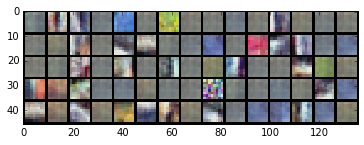

Logreg Errors for n_patches 100 : 5033
Forest Errors : 4892
n_patches: 1000
8


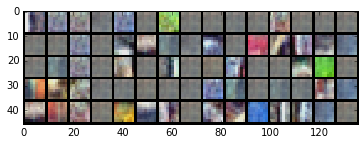

Logreg Errors for n_patches 1000 : 4971
Forest Errors : 4888
n_patches: 10000
8


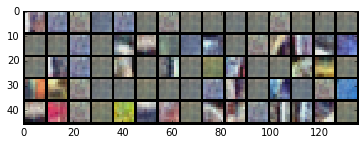

Logreg Errors for n_patches 10000 : 4994
Forest Errors : 4857
n_patches: 100000
8


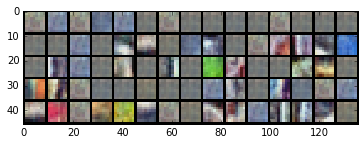

Logreg Errors for n_patches 100000 : 4968
Forest Errors : 4879


In [41]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
images = images_dict['X']
# n_patches = 20000
patch_size = 8

visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
# data = np.arange(4,7).reshape(1, 3)
beta = 3
sparcity = 1e-2
lambda_ = 1e-4

step = 8

logreg_errs = []
rf_errs = []

n_patches_lst = [100, 1000, 10000, 100000]
for n_patches in n_patches_lst:
#     theta = initialize(hidden_layer_sizes, visible_layer_size)
    
    patches = sample_patches(images, n_patches, patch_size)
    print('n_patches:', patches.shape[0])
    res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, 
                                              sparcity, beta, data)
               , x0=theta, method="L-BFGS-B", jac=True, options={'maxiter':2000, 'disp':1})
    theta = res['x']
    np.save('../data/theta_npatches_'+str(n_patches)+'.npy', theta)
    filters = autoencoder_get_filters(theta, visible_layer_size, hidden_layer_sizes)
    img = display_layer(filters, '../images/filters_npatches_' + str(n_patches)+'.png')
    plt.imshow(img, interpolation='Nearest')
    plt.show()
    
    features = get_features(train[:, :], 8, step, 1, hidden_layer_sizes, visible_layer_size, theta)
    logreg = LogisticRegression()
    logreg.fit(features, answers[:, 0])
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rf.fit(features, answers[:, 0])
    
    features = get_features(test, 8, step, 1, hidden_layer_sizes, visible_layer_size, theta)
    ae_test_predicted = logreg.predict(features)
    print('Logreg Errors for n_patches', n_patches, ':', np.sum(ae_test_predicted != test_answers[:,0]))
    logreg_errs.append(np.sum(ae_test_predicted != test_answers[:,0]))
    ae_test_predicted = rf.predict(features)
    print('Forest Errors :', np.sum(ae_test_predicted != test_answers[:,0]))
    rf_errs.append(np.sum(ae_test_predicted != test_answers[:,0]))

file encoding: UTF-8
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}


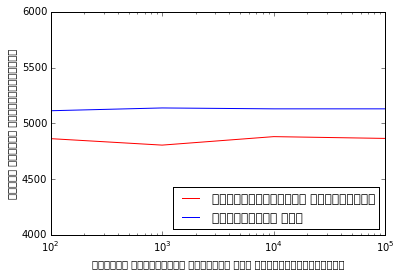

In [39]:
plt.plot(n_patches_lst, rf_errs, '-r', label='Логистическая регрессия')
plt.plot(n_patches_lst, logreg_errs, '-b', label='Случайный лес')
plt.ylim(4000, 6000)
plt.xscale("log", nonposx='clip')
plt.xlabel("Размер обучающей выборки для автокодировщика")
plt.ylabel("Число ошибок классификации")
plt.legend(loc=4)
tikz.save("../images/classification_quality_wrt_dataset_size.tikz")

##Использование функции активации Rectified Linear Unit

В данном разделе проводятся эксперименты по использованию функции активации типа RLU (Rectified Linear Unit) и ее сравнение с сигмоидной функцией активации.

Обучим нейронную сеть с RLU и рассмотрим полученные фильтры.

8


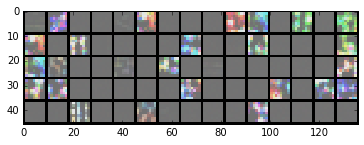

In [5]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
images = images_dict['X']
n_patches = 20000
patch_size = 8
patches = sample_patches(images, n_patches, patch_size)

visible_layer_size = patch_size * patch_size * 3
hidden_layer_sizes = np.array([75])
theta = initialize(hidden_layer_sizes, visible_layer_size)
data = patches
# data = np.arange(4,7).reshape(1, 3)
beta = 3
sparcity = 1e-2
lambda_ = 1e-4

res = minimize(lambda x: autoencoder_loss(x, visible_layer_size, hidden_layer_sizes, lambda_, sparcity, beta, data, 
                                          rlu=True)
           , x0=theta, method="L-BFGS-B", jac=True, options={'maxiter':2000, 'disp':1})
theta = res['x']
np.save('../data/theta_rlu.npy', theta)
filters = autoencoder_get_filters(theta, visible_layer_size, hidden_layer_sizes, rlu=True)
img = display_layer(filters, '../images/filters_rlu.png')
plt.imshow(img, interpolation='Nearest')
plt.show()
theta_rlu = theta

Рассмотрим теперь качество классификации для автокодировщика с функциями активации rlu.

In [10]:
images_dict = pickle.load(open('../data/train.pk', 'rb'))
train = images_dict['X'].astype(float)
answers = images_dict['y']
train = normalize_data(train)
images_dict = pickle.load(open('../data/test.pk', 'rb'))
test = images_dict['X'].astype(float)
test_answers = images_dict['y']
test = normalize_data(test)

logregs = []
for step in [4, 8, 16, 32]:
    print('Step:', step)
    features = get_features(train[:, :], 8, step, 1, hidden_layer_sizes, visible_layer_size, theta_rlu)
    logregs.append(LogisticRegression())
    logregs[-1].fit(features, answers[:, 0])

Step: 4
Errors for step 4 : 1
Step: 8
Errors for step 8 : 1
Step: 16
Errors for step 16 : 1
Step: 32
Errors for step 32 : 1


In [ ]:
forests = []
for step in [4, 8, 16, 32]:
    print('Step:', step)
    features = get_features(train[:, :], 8, step, 2, hidden_layer_sizes, visible_layer_size, theta_rlu)
    forests.append(RandomForestClassifier(n_estimators=100, n_jobs=-1))
    forests[-1].fit(features, answers[:, 0])
i = 0
for step in [4, 8, 16, 32]:
    features = get_features(test, 8, step, 2, hidden_layer_sizes, visible_layer_size, theta_rlu)
    ae_test_predicted = forests[i].predict(features)
    print('Errors for step', step, ':', np.sum(ae_test_predicted != test_answers[:,0]))